In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas ,NumPy matplotlib
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [3]:
# Importing all datasets
url = "https://raw.githubusercontent.com/bhavna9719/Titanic/master/train.csv"
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Checking rows and columns count
titanic.shape

(891, 12)

In [5]:
# Checking datatypes and null values of each column
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Checking statistical data of numerical columns
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Preparing the dataset

In [8]:
# Drop unnecessary columns
titanic.drop(["PassengerId", "Cabin", "Name", "Ticket"], axis = 1, inplace = True)

In [9]:
# Checking dataframe after drop
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
# Filling null values with mean of age
age_mean = titanic.Age.mean()
titanic.Age.fillna( value = age_mean, inplace = True)
titanic.Age.isnull().sum()

0

In [11]:
# Filling null values with mode 
titanic.Embarked.fillna( value = titanic.Embarked.mode()[0], inplace = True)
titanic.Embarked.isnull().sum()

0

In [12]:
# Re-checking total null values
titanic.isnull().sum().sum()

0

In [13]:
# Exploratory Data Analysis 

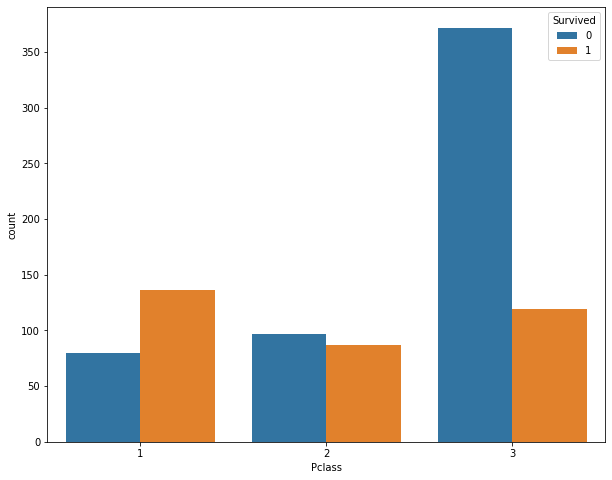

In [14]:
# Ticket class survivals
plt.figure( figsize = [10,8])
sns.countplot( titanic["Pclass"], hue = titanic["Survived"])
plt.show()

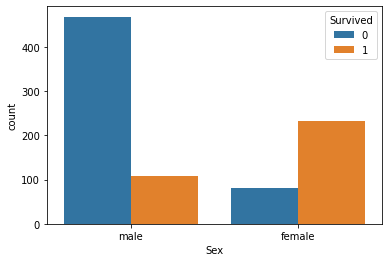

In [15]:
# Plotting survival count gender-wise
sns.countplot( titanic["Sex"], hue = titanic["Survived"])
plt.show()

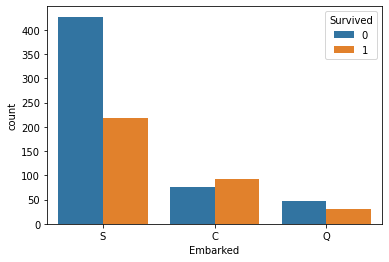

In [16]:
# Plotting survival count Embarked-wise
sns.countplot( titanic["Embarked"], hue = titanic["Survived"])
plt.show()

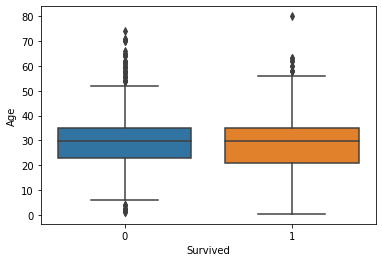

In [17]:
# Age and survival plot
sns.boxplot( titanic["Survived"], titanic["Age"])
plt.show()

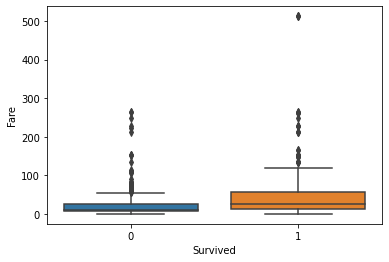

In [18]:
# Fair and survival plot
sns.boxplot( titanic["Survived"], titanic["Fare"])
plt.show()

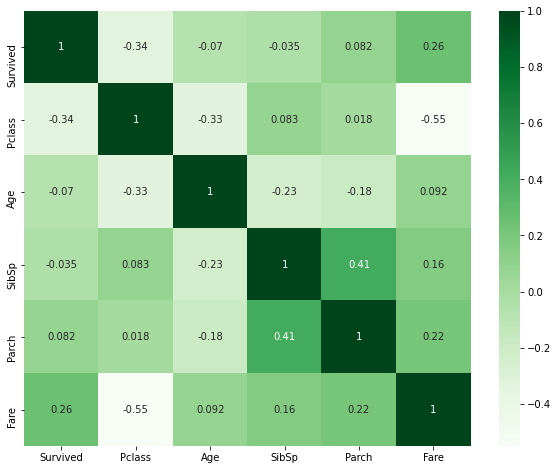

In [19]:
# Checking correlation
plt.figure( figsize = [10,8])
sns.heatmap(titanic.corr(), annot = True, cmap = "Greens")
plt.show()

In [20]:
# Preparing data for model building

In [21]:
titanic.head() 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [22]:
# Defining the map function
variable = ["Sex"]

def binary_map(x):
    return x.map({'female': 1, "male": 0})

# Applying the function to Sex variable
titanic[variable] = titanic[variable].apply(binary_map)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [23]:
# Defining the map function to define the class lower to higher in numerical terms
variable1 = ["Pclass"]

titanic[variable1] = titanic[variable1].apply(lambda x : x.map({3: 1, 2:2, 1:3}))
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,22.0,1,0,7.2500,S
1,1,3,1,38.0,1,0,71.2833,C
2,1,1,1,26.0,0,0,7.9250,S
3,1,3,1,35.0,1,0,53.1000,S
4,0,1,0,35.0,0,0,8.0500,S


In [24]:
# Creating dummy variables for the variable 'Embarked'. 
dummy1 = pd.get_dummies(titanic["Embarked"], drop_first=True)

# Adding the results to the master dataframe
titanic = pd.concat([titanic, dummy1], axis=1)

# Dropping the variable of which dummies are created
titanic.drop("Embarked", axis = 1, inplace = True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,1,0,22.0,1,0,7.2500,0,1
1,1,3,1,38.0,1,0,71.2833,0,0
2,1,1,1,26.0,0,0,7.9250,0,1
3,1,3,1,35.0,1,0,53.1000,0,1
4,0,1,0,35.0,0,0,8.0500,0,1


In [25]:
# importing required libraries
from sklearn.preprocessing import StandardScaler

In [26]:
# Scaling Age and Fare variables
scaler = StandardScaler()

titanic[['Age','Fare']] = scaler.fit_transform(titanic[['Age','Fare']])

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,1,0,-0.592481,1,0,-0.502445,0,1
1,1,3,1,0.638789,1,0,0.786845,0,0
2,1,1,1,-0.284663,0,0,-0.488854,0,1
3,1,3,1,0.407926,1,0,0.420730,0,1
4,0,1,0,0.407926,0,0,-0.486337,0,1


In [27]:
# Checking statistical calc of variables
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
count,891.000000,891.000000,891.000000,8.910000e+02,891.000000,891.000000,8.910000e+02,891.000000,891.000000
mean,0.383838,1.691358,0.352413,2.562796e-16,0.523008,0.381594,-4.373606e-17,0.086420,0.725028
std,0.486592,0.836071,0.477990,1.000562e+00,1.102743,0.806057,1.000562e+00,0.281141,0.446751
min,0.000000,1.000000,0.000000,-2.253155e+00,0.000000,0.000000,-6.484217e-01,0.000000,0.000000
25%,0.000000,1.000000,0.000000,-5.924806e-01,0.000000,0.000000,-4.891482e-01,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-3.573909e-01,0.000000,1.000000
75%,1.000000,2.000000,1.000000,4.079260e-01,1.000000,0.000000,-2.424635e-02,0.000000,1.000000
max,1.000000,3.000000,1.000000,3.870872e+00,8.000000,6.000000,9.667167e+00,1.000000,1.000000


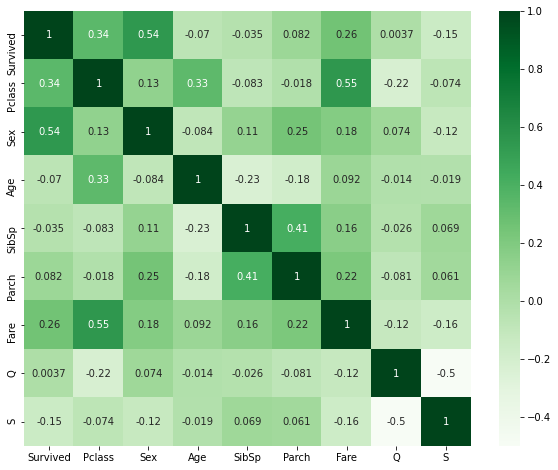

In [28]:
# Re-checking correlations with survival
plt.figure( figsize = [10,8])
sns.heatmap(titanic.corr(), annot = True, cmap = "Greens")
plt.show()

In [29]:
# Checking suruvival rate
titanic.Survived.value_counts( normalize = True) * 100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [30]:
# Preparing dataframe for model building

y_train = titanic.pop('Survived')
X_train = titanic

In [31]:
# Checking heads
print(X_train.head())
print(y_train.head())

   Pclass  Sex       Age  SibSp  Parch      Fare  Q  S
0       1    0 -0.592481      1      0 -0.502445  0  1
1       3    1  0.638789      1      0  0.786845  0  0
2       1    1 -0.284663      0      0 -0.488854  0  1
3       3    1  0.407926      1      0  0.420730  0  1
4       1    0  0.407926      0      0 -0.486337  0  1
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [32]:
# Importing required libraries
import statsmodels.api as sm

In [33]:
# Building model 1
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      882
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.39
Date:                Thu, 01 Oct 2020   Deviance:                       784.78
Time:                        12:04:18   Pearson chi2:                     904.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9642      0.365     -8.120      0.000      -3.680      -2.249
Pclass         1.1022      0.144      7.675      0.000       0.821       1.384
Sex            2.7272      0.201     13.597      0.000       2.334       3.120
Age           -0.5154      0.102     -5.061      0.000      -0.715      -0.316
SibSp         -0.3269      0.110     -2.985      0.003      -0.542      -0.112
Parch         -0.0946      0.119     -0.797      0.426      -0.327       0.138
Fare           0.0974      0.118      0.823      0.410      -0.134       0.329
Q             -0.0327      0.382     -0.085      0.932      -0.782       0.717
S             -0.4139      0.237     -1.748      0.081      -0.878       0.050
==============================================================================
"""

In [34]:
# Dropping high p-value variable
X_train.drop("Q", axis = 1, inplace = True)

In [35]:
# Building model 2
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      883
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.39
Date:                Thu, 01 Oct 2020   Deviance:                       784.79
Time:                        12:04:18   Pearson chi2:                     905.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9792      0.321     -9.293      0.000      -3.608      -2.351
Pclass         1.1049      0.140      7.894      0.000       0.831       1.379
Sex            2.7253      0.199     13.676      0.000       2.335       3.116
Age           -0.5160      0.102     -5.081      0.000      -0.715      -0.317
SibSp         -0.3269      0.109     -2.986      0.003      -0.542      -0.112
Parch         -0.0937      0.118     -0.792      0.428      -0.325       0.138
Fare           0.0980      0.118      0.829      0.407      -0.134       0.329
S             -0.4034      0.203     -1.990      0.047      -0.801      -0.006
==============================================================================
"""

In [36]:
# Dropping high p-value variable
X_train.drop("Parch", axis = 1, inplace = True)

In [37]:
# Building model 3
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      884
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.71
Date:                Thu, 01 Oct 2020   Deviance:                       785.42
Time:                        12:04:18   Pearson chi2:                     910.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0063      0.318     -9.443      0.000      -3.630      -2.382
Pclass         1.1165      0.139      8.038      0.000       0.844       1.389
Sex            2.6936      0.195     13.841      0.000       2.312       3.075
Age           -0.5123      0.101     -5.059      0.000      -0.711      -0.314
SibSp         -0.3493      0.106     -3.287      0.001      -0.558      -0.141
Fare           0.0774      0.113      0.685      0.493      -0.144       0.299
S             -0.4160      0.202     -2.061      0.039      -0.812      -0.020
==============================================================================
"""

In [38]:
# Dropping high p-value variable
X_train.drop("Fare", axis = 1, inplace = True)

In [39]:
# Building model 4
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      885
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.96
Date:                Thu, 01 Oct 2020   Deviance:                       785.91
Time:                        12:04:18   Pearson chi2:                     912.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0860      0.297    -10.406      0.000      -3.667      -2.505
Pclass         1.1651      0.120      9.693      0.000       0.930       1.401
Sex            2.7007      0.194     13.901      0.000       2.320       3.082
Age           -0.5159      0.101     -5.104      0.000      -0.714      -0.318
SibSp         -0.3343      0.104     -3.222      0.001      -0.538      -0.131
S             -0.4414      0.198     -2.225      0.026      -0.830      -0.053
==============================================================================
"""

In [40]:
# Importing required library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Pclass,2.96
4,S,2.41
1,Sex,1.59
3,SibSp,1.30
2,Age,1.15


In [42]:
# Checking predicted values
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.08385815, 0.92027575, 0.61897882, 0.89319244, 0.07091022,
       0.12775841, 0.26955491, 0.09399972, 0.60957279, 0.90324265])

In [43]:
# new dataframe to compare actual and predicted
y_train_pred_final = pd.DataFrame({'Survived':y_train.values, 'Survival_Prob':y_train_pred})
y_train_pred_final.head()

,Survived,Survival_Prob
0,0,0.083858
1,1,0.920276
2,1,0.618979
3,1,0.893192
4,0,0.070910


In [44]:
# Adding column "Predicted"
y_train_pred_final['predicted'] = y_train_pred_final.Survival_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Survived,Survival_Prob,predicted
0,0,0.083858,0
1,1,0.920276,1
2,1,0.618979,1
3,1,0.893192,1
4,0,0.070910,0


In [45]:
# Importing required library
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.predicted )
print(confusion)

[[471  78]
 [ 98 244]]


In [46]:
# Predicted     not_sur    sur
# Actual
# not_sur        471      78
# sur            98       244  

In [47]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.predicted))

0.8024691358024691


In [48]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [49]:
# Let's see the sensitivity of our logistic regression model 
TP / float(TP+FN)

0.7134502923976608

In [50]:
# Let us calculate specificity
TN / float(TN+FP)

0.8579234972677595

In [51]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/ float(TN+FP)

0.14207650273224043

In [52]:
# positive predictive value 
TP / float(TP+FP)

0.7577639751552795

In [53]:
# Negative predictive value
TN / float(TN+ FN)

0.827768014059754

In [54]:
# Defining draw_roc function 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [55]:
# Assigning values
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Survived, y_train_pred_final.Survival_Prob, drop_intermediate = False )

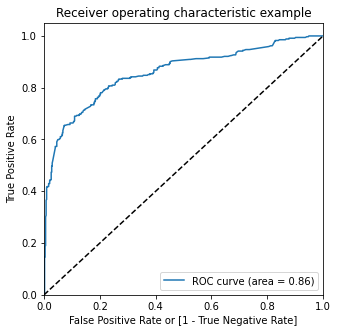

In [56]:
# Calling the draw_roc func
draw_roc(y_train_pred_final.Survived, y_train_pred_final.Survival_Prob)

In [57]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Survival_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Survived,Survival_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.083858,0,1,0,0,0,0,0,0,0,0,0
1,1,0.920276,1,1,1,1,1,1,1,1,1,1,1
2,1,0.618979,1,1,1,1,1,1,1,1,0,0,0
3,1,0.893192,1,1,1,1,1,1,1,1,1,1,0
4,0,0.070910,0,1,0,0,0,0,0,0,0,0,0


In [58]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383838  1.000000  0.000000
0.1   0.1  0.557800  0.923977  0.329690
0.2   0.2  0.712682  0.850877  0.626594
0.3   0.3  0.771044  0.824561  0.737705
0.4   0.4  0.789001  0.763158  0.805100
0.5   0.5  0.802469  0.713450  0.857923
0.6   0.6  0.814815  0.657895  0.912568
0.7   0.7  0.792368  0.505848  0.970856
0.8   0.8  0.756453  0.380117  0.990893
0.9   0.9  0.691358  0.204678  0.994536


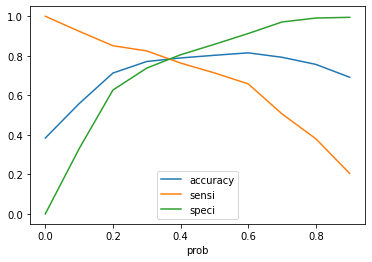

In [59]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [60]:
# Adding column final predicted
y_train_pred_final['final_predicted'] = y_train_pred_final.Survival_Prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,Survived,Survival_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.083858,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.920276,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.618979,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.893192,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.070910,0,1,0,0,0,0,0,0,0,0,0,0


In [61]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.final_predicted)

0.7833894500561167

In [62]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.final_predicted )
confusion2

array([[422, 127],
       [ 66, 276]])

In [63]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [64]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8070175438596491

In [65]:
# Let us calculate specificity
TN / float(TN+FP)

0.7686703096539163

In [66]:
# Calculate false postive rate
FP/ float(TN+FP)

0.23132969034608378

In [67]:
# Positive predictive value 
TP / float(TP+FP)

0.684863523573201

In [68]:
# Negative predictive value
TN / float(TN+ FN)

0.8647540983606558

In [69]:
# Recall and Precision

In [70]:
# importing required libraries
from sklearn.metrics import precision_recall_curve

In [71]:
# Printing head of required columns
y_train_pred_final.Survived.head(), y_train_pred_final.predicted.head()

(0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int64, 0    0
 1    1
 2    1
 3    1
 4    0
 Name: predicted, dtype: int64)

In [72]:
# Assigning values
p, r, thresholds = precision_recall_curve(y_train_pred_final.Survived, y_train_pred_final.Survival_Prob)

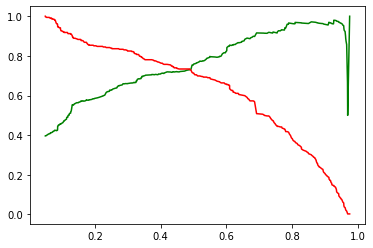

In [73]:
# Plotting recall and precision
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Making predictions on test dataset

In [74]:
# importing test file
url1 = "https://raw.githubusercontent.com/bhavna9719/Titanic/master/test.csv"
titanic_test = pd.read_csv(url1)

In [75]:
# New dataframe for submission
Submission = pd.DataFrame(({'PassengerId':titanic_test.PassengerId}))
Submission.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [76]:
# Checking the dataset
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [77]:
# Rows and columns count
titanic_test.shape

(418, 11)

In [78]:
# Checking null values and datatypes
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [79]:
# Filling null values with mean of age
titanic_test.Age.fillna( value = age_mean, inplace = True)
titanic_test.Age.isnull().sum()

0

In [80]:
# Applying the function to Sex variable
titanic_test[variable] = titanic_test[variable].apply(binary_map)
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [81]:
# Defining the map function to define the class lower to higher in numerical term
titanic_test[variable1] = titanic_test[variable1].apply(lambda x : x.map({3: 1, 2:2, 1:3}))
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,1,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,1,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [82]:
# Creating dummy variables for the variable 'Embarked'. 
dummy1 = pd.get_dummies(titanic_test["Embarked"], drop_first=True)

# Adding the results to the master dataframe
titanic_test = pd.concat([titanic_test, dummy1], axis=1)

# Dropping the variable of which dummies are created
titanic_test.drop("Embarked", axis = 1, inplace = True)
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Q,S
0,892,1,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,1,0
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,1,0
3,895,1,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,1
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,1


In [83]:
titanic_test[['Age','Fare']] = scaler.transform(titanic_test[['Age','Fare']])
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Q,S
0,892,1,"Kelly, Mr. James",0,0.369449,0,0,330911,-0.490783,NaN,1,0
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",1,1.331378,1,0,363272,-0.507479,NaN,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,2.485693,0,0,240276,-0.453367,NaN,1,0
3,895,1,"Wirz, Mr. Albert",0,-0.207709,0,0,315154,-0.474005,NaN,0,1
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,-0.592481,1,1,3101298,-0.401017,NaN,0,1


In [84]:
# Drop unnecessary columns
titanic_test.drop(["PassengerId", "Cabin", "Name", "Ticket", "Q", "Parch", "Fare", ], axis = 1, inplace = True)

In [85]:
# Checking scaled variables
titanic_test.describe()

,Pclass,Sex,Age,SibSp,S
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1.734450,0.363636,0.035052,0.447368,0.645933
std,0.841838,0.481622,0.972446,0.896760,0.478803
min,1.000000,0.000000,-2.272394,0.000000,0.000000
25%,1.000000,0.000000,-0.515526,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,0.465642,1.000000,1.000000
max,3.000000,1.000000,3.563054,8.000000,1.000000


In [86]:
# Adding constant
X_test_sm = sm.add_constant(titanic_test)

In [87]:
# predicting and checking predicted values
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

0    0.107982
1    0.335634
2    0.115255
3    0.094902
4    0.576804
5    0.149427
6    0.683054
7    0.200248
8    0.776300
9    0.063823
dtype: float64

In [88]:
# Adding new column of final prediction
Submission['Survived'] = y_test_pred.map(lambda x: 1 if x > 0.33 else 0)
Submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [89]:
# Value counts of 0 and 1
Submission.Survived.value_counts( normalize = True)

0    0.528708
1    0.471292
Name: Survived, dtype: float64